In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [3]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [6]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [7]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

581

In [29]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | san quintin
Processing Record 4 of Set 1 | asfi
Processing Record 5 of Set 1 | busselton
Processing Record 6 of Set 1 | mar del plata
Processing Record 7 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 8 of Set 1 | pizarro
Processing Record 9 of Set 1 | kaitangata
Processing Record 10 of Set 1 | dikson
Processing Record 11 of Set 1 | new norfolk
Processing Record 12 of Set 1 | barrow
Processing Record 13 of Set 1 | urdzhar
City not found. Skipping...
Processing Record 14 of Set 1 | obihiro
Processing Record 15 of Set 1 | solnechnyy
Processing Record 16 of Set 1 | cabedelo
Processing Record 17 of Set 1 | faanui
Processing Record 18 of Set 1 | codrington
Processing Record 19 of Set 1 | bandarbeyla
Processing Record 20 of Set 1 | torbay
Processing Record 21 of Set 1 | craig
Processing Record 22 of Set 1 

Processing Record 38 of Set 4 | astipalaia
City not found. Skipping...
Processing Record 39 of Set 4 | bavtugay
Processing Record 40 of Set 4 | kondinskoye
Processing Record 41 of Set 4 | mandalgovi
Processing Record 42 of Set 4 | cabo san lucas
Processing Record 43 of Set 4 | russell
Processing Record 44 of Set 4 | gaya
Processing Record 45 of Set 4 | carutapera
Processing Record 46 of Set 4 | marzuq
Processing Record 47 of Set 4 | lagoa
Processing Record 48 of Set 4 | maralal
Processing Record 49 of Set 4 | millau
Processing Record 50 of Set 4 | bairiki
Processing Record 1 of Set 5 | talnakh
Processing Record 2 of Set 5 | udankudi
Processing Record 3 of Set 5 | shimoda
Processing Record 4 of Set 5 | macaboboni
City not found. Skipping...
Processing Record 5 of Set 5 | evinayong
Processing Record 6 of Set 5 | cubuk
Processing Record 7 of Set 5 | djibo
Processing Record 8 of Set 5 | yamada
Processing Record 9 of Set 5 | illoqqortoormiut
City not found. Skipping...
Processing Record 10 

Processing Record 25 of Set 8 | conakry
Processing Record 26 of Set 8 | bridlington
Processing Record 27 of Set 8 | rio grande
Processing Record 28 of Set 8 | saleaula
City not found. Skipping...
Processing Record 29 of Set 8 | aquiraz
Processing Record 30 of Set 8 | mnogovershinnyy
Processing Record 31 of Set 8 | puyang
Processing Record 32 of Set 8 | rosarito
Processing Record 33 of Set 8 | hami
Processing Record 34 of Set 8 | ust-tsilma
Processing Record 35 of Set 8 | imuris
Processing Record 36 of Set 8 | atbasar
Processing Record 37 of Set 8 | utraula
Processing Record 38 of Set 8 | quatre cocos
Processing Record 39 of Set 8 | san jose
Processing Record 40 of Set 8 | hjelset
Processing Record 41 of Set 8 | sandnessjoen
Processing Record 42 of Set 8 | kamaishi
Processing Record 43 of Set 8 | mogocha
Processing Record 44 of Set 8 | muravlenko
Processing Record 45 of Set 8 | ilulissat
Processing Record 46 of Set 8 | hornepayne
Processing Record 47 of Set 8 | bundi
Processing Record 4

Processing Record 13 of Set 12 | bouar
Processing Record 14 of Set 12 | ryotsu
Processing Record 15 of Set 12 | kazalinsk
City not found. Skipping...
Processing Record 16 of Set 12 | nabire
Processing Record 17 of Set 12 | rosolini
Processing Record 18 of Set 12 | atambua
Processing Record 19 of Set 12 | los llanos de aridane
Processing Record 20 of Set 12 | mashhad
Processing Record 21 of Set 12 | dongsheng
Processing Record 22 of Set 12 | umm kaddadah
Processing Record 23 of Set 12 | salinopolis
Processing Record 24 of Set 12 | payson
Processing Record 25 of Set 12 | armizonskoye
Processing Record 26 of Set 12 | goldsboro
Processing Record 27 of Set 12 | litovko
Processing Record 28 of Set 12 | damietta
Processing Record 29 of Set 12 | andilamena
Processing Record 30 of Set 12 | sorong
Processing Record 31 of Set 12 | nuevo progreso
-----------------------------
Data Retrieval Complete      
-----------------------------


In [37]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,40.66,70,75,17.27,AR,2021-11-29 08:03:25
1,Rikitea,-23.1203,-134.9692,76.35,76,0,18.10,PF,2021-11-29 08:05:56
2,San Quintin,30.4833,-115.9500,61.39,68,0,4.07,MX,2021-11-29 08:05:56
3,Asfi,32.2994,-9.2372,54.52,64,0,13.13,MA,2021-11-29 08:04:41
4,Busselton,-33.6500,115.3333,70.39,44,2,15.88,AU,2021-11-29 08:05:57
5,Mar Del Plata,-38.0023,-57.5575,60.04,97,100,18.41,AR,2021-11-29 08:05:57
6,Pizarro,4.9533,-77.3660,75.45,92,41,5.46,CO,2021-11-29 08:05:58
7,Kaitangata,-46.2817,169.8464,57.06,70,91,4.47,NZ,2021-11-29 08:03:17
8,Dikson,73.5069,80.5464,-15.66,98,99,18.68,RU,2021-11-29 08:05:58
9,New Norfolk,-42.7826,147.0587,63.90,68,88,4.63,AU,2021-11-29 08:05:58


In [38]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [39]:
df = city_data_df[new_column_order]

In [31]:
city_data_df[new_column_order]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2021-11-29 08:03:25,-54.8000,-68.3000,40.66,70,75,17.27
1,Rikitea,PF,2021-11-29 08:05:56,-23.1203,-134.9692,76.35,76,0,18.10
2,San Quintin,MX,2021-11-29 08:05:56,30.4833,-115.9500,61.39,68,0,4.07
3,Asfi,MA,2021-11-29 08:04:41,32.2994,-9.2372,54.52,64,0,13.13
4,Busselton,AU,2021-11-29 08:05:57,-33.6500,115.3333,70.39,44,2,15.88
...,...,...,...,...,...,...,...,...,...
529,Litovko,RU,2021-11-29 08:20:40,49.2361,135.1742,8.91,97,95,3.18
530,Damietta,EG,2021-11-29 08:20:41,31.4165,31.8133,77.13,52,13,10.40
531,Andilamena,MG,2021-11-29 08:20:41,-17.0167,48.5833,77.54,59,86,7.23
532,Sorong,ID,2021-11-29 08:20:42,-0.8833,131.2500,85.44,73,100,7.94


In [40]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [41]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

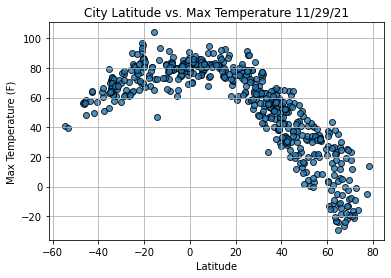

In [42]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

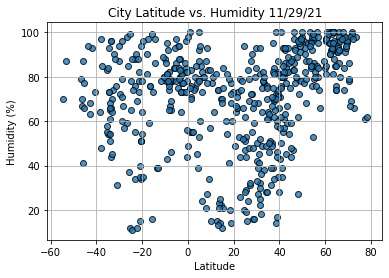

In [43]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

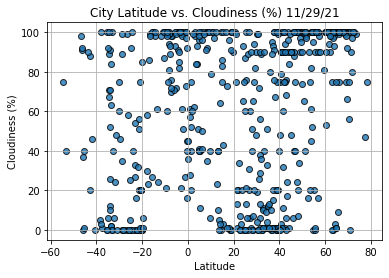

In [44]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

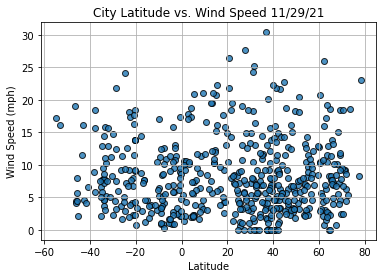

In [45]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()